# To identify different segments in the existing customers of  AllLife Bank based on their spending patterns as well as past interaction with the bank.

# Key Questions:

# 1. How many different segments of customers are there? 
# 2. How are these segments different from each other? 
# 3. What are your recommendations to the bank on how to better market to and service these customers? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score

## Univariate Analysis

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")
df.shape

(660, 7)

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
df.drop('Sl_No', axis=1, inplace=True)

In [6]:
df[df.isna().any(axis=1)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


### To get idea about no of clusters, do kde plot, but will rely on silohoutte scores and distribution for K-Means

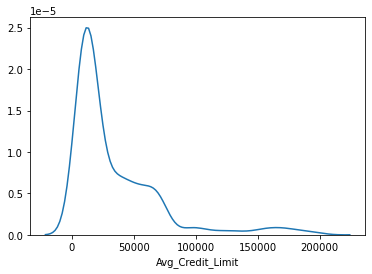

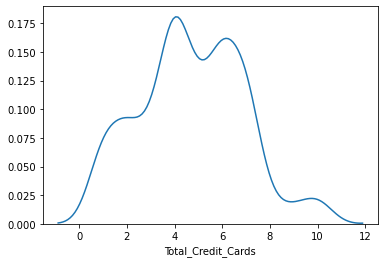

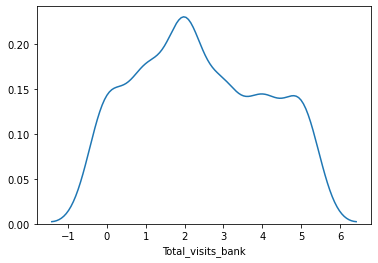

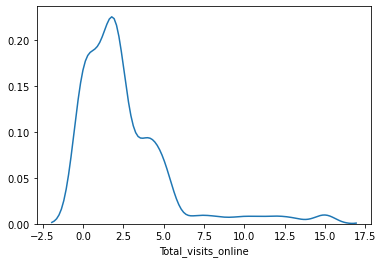

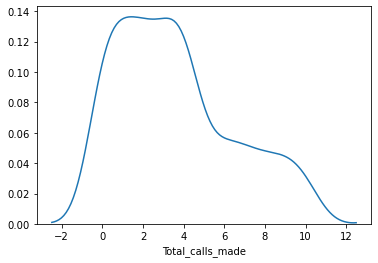

In [7]:
for i in df.columns[df.columns!='Customer Key']:
    sns.distplot(df[i],hist=False,)
    plt.show()

In [8]:
dfWOCustKey = df.drop('Customer Key', axis=1)
dfWOCustKey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


### Avg_Credit_Limit and Total_visits_online has outliers and check it can affect cluster assignment, box plots

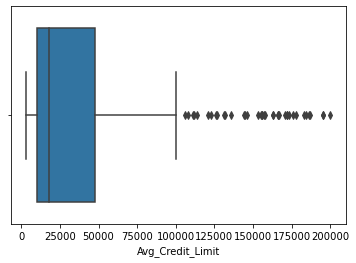

In [9]:
sns.boxplot(df['Avg_Credit_Limit'])

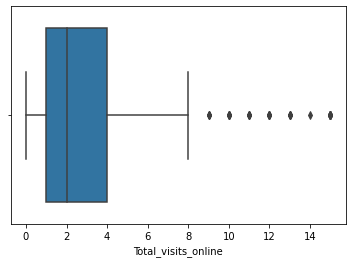

In [10]:
sns.boxplot(df['Total_visits_online'])

In [11]:
dfAttr=df.iloc[:,1:]

dfScaled=dfAttr.apply(zscore)
dfScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


## K-Means Clustering

### Group Data into similar clusters

### Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the right number of groups. We do the elbow knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

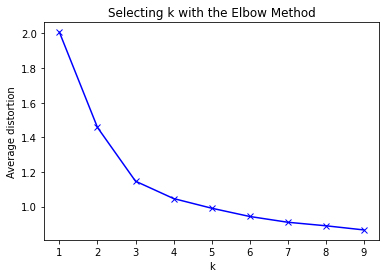

In [12]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## 3 or 4 clusters seem appropriate, but check Silhoutte Scores for a range of clusters

In [13]:
KMeans_vs_k = [KMeans(n_clusters=k).fit(dfScaled) for k in range (1, 10)]
silhoutteScores = [silhouette_score(dfScaled, model.labels_) for model in KMeans_vs_k[1: ]]
print(silhoutteScores)

[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.2726898791817692, 0.25545029453623114, 0.2479547871676149, 0.22833255027905516, 0.21807152060553814]


In [14]:
print(max(silhoutteScores))

0.5157182558881063


In [15]:
final_model=KMeans(n_clusters=2)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["CLUSTER"] = prediction
dfScaled["CLUSTER"] = prediction
print("Clusters Assigned : \n")
df.head()

Clusters Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,1
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,0


In [16]:
dfClust = df.groupby(['CLUSTER'])
dfClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER,,,,,,
0,55090.896789,46082.568807,5.885321,3.158257,2.119266,1.894495
1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536


In [17]:
labels = final_model.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[436 224]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09B41230>,
      dtype=object)

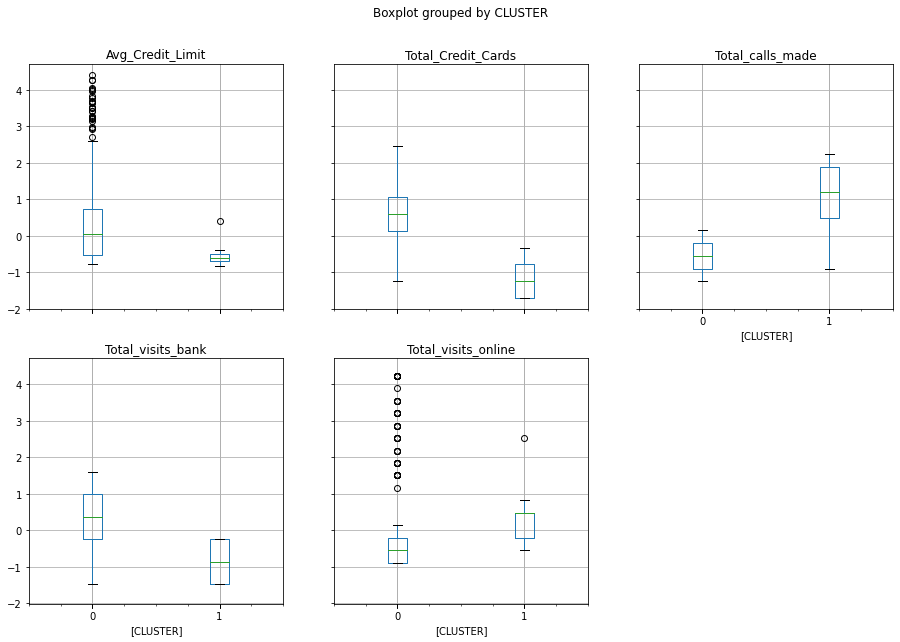

In [18]:
dfScaled.boxplot(by='CLUSTER', layout = (2,3),figsize=(15,10))

### Though separated, like we saw in univariate analysis, 2 feaures show outliers, do 3 clusters and see.

In [19]:
final_model=KMeans(n_clusters=3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["CLUSTER"] = prediction
dfScaled["CLUSTER"] = prediction
print("Clusters Assigned : \n")
df.head()

Clusters Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2


In [20]:
dfClust = df.groupby(['CLUSTER'])
dfClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


In [21]:
labels = final_model.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[224 386  50]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A4744F0>,
      dtype=object)

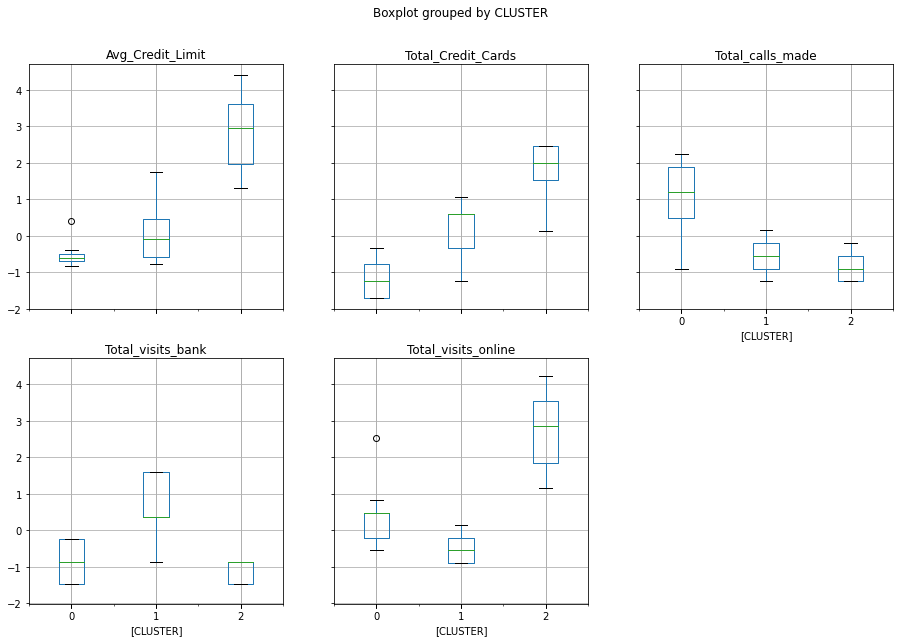

In [22]:
dfScaled.boxplot(by='CLUSTER', layout = (2,3),figsize=(15,10))

### With 3 clusters, though silhoutte score is less than 2 clusters, people with Avg_Credit_Limit and Total_Credit_cards in the highest ranges compared to the other 2 clusters are categorized in a separate cluster and distribution looks better w/o outliers and 3 clusters seems good choice. 

### People with Avg_Credit_Limit and Total_Credit_cards in the highest ranges have also Total_visits_online in the highest range. People with Avg_Credit_Limit and Total_Credit_cards in the intermediate ranges visit bank more than the other 2 clusters.  People with Avg_Credit_Limit and Total_Credit_cards in the lowest ranges make calls more than the other 2 clusters.

## Heirarchial Clustering

### Drop CLUSTER column from data frames df, dfScaled and some analysis can be reused using same data frames

In [23]:
df.drop('CLUSTER', axis=1, inplace=True)


In [24]:
dfScaled.drop('CLUSTER', axis=1, inplace=True)

## Check Cophenetic Corrlearion/Index beween Euclidean distance and dendtogrammic distance got with different dentograms using different metric

In [25]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(dfScaled, 'average', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.8977080867389372

In [26]:
Z = linkage(dfScaled, 'complete', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.8599730607972423

In [27]:
Z = linkage(dfScaled, 'centroid', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.8939385846326323

In [28]:
Z = linkage(dfScaled, 'ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.7415156284827493

In [29]:
Z = linkage(dfScaled, 'average', metric='euclidean')
cophenet(Z , pdist(dfScaled))

(0.8977080867389372,
 array([3.25253923, 3.11135778, 3.11135778, ..., 2.3870557 , 1.11695686,
        2.3870557 ]))

### From Cophentic Index results from different metrics, we will use average metric

In [30]:
Z.shape

(659, 4)

### Plot the dendrogram for the consolidated dataframe

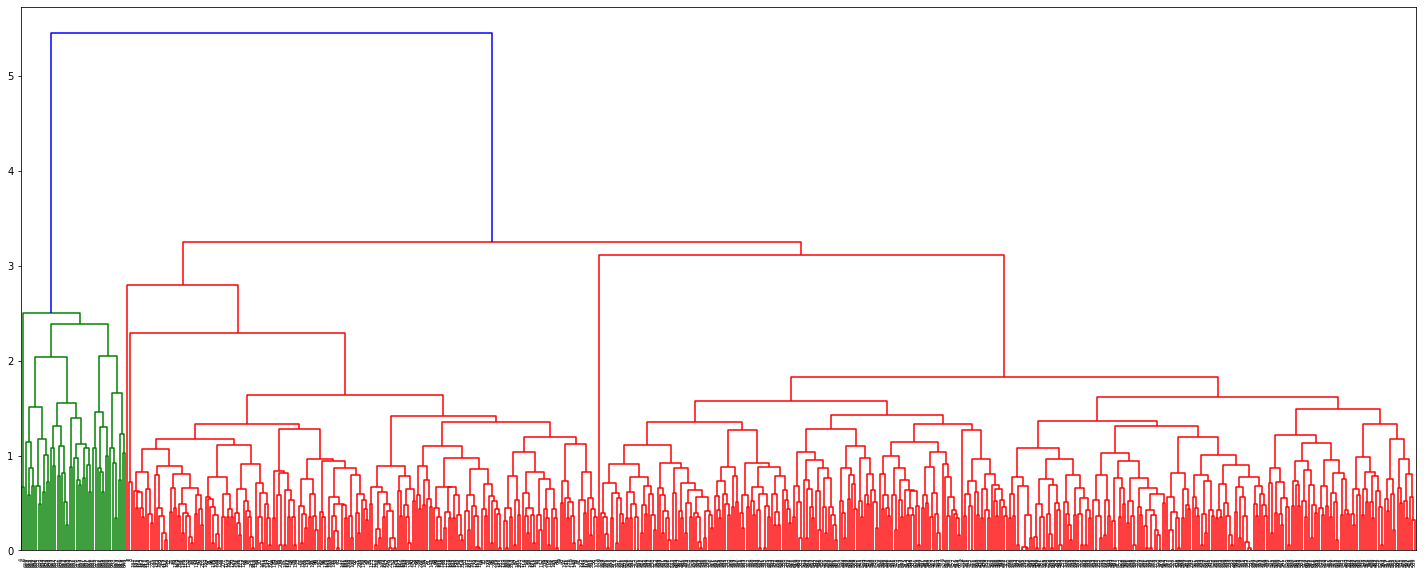

In [31]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

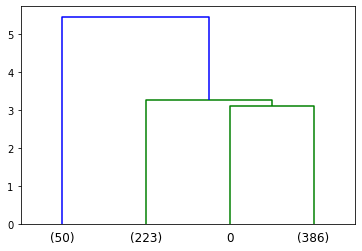

In [32]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

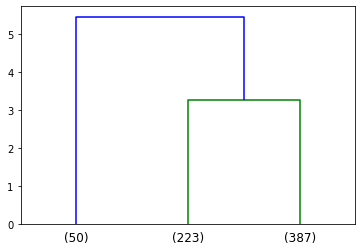

In [33]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 3.2 , criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [35]:
silhouette_score(dfScaled,clusters)

0.515922432650965

In [36]:
df["CLUSTER"] = clusters
dfScaled["CLUSTER"] = clusters
df.head(20)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,2
2,17341,50000,7,1,3,4,3
3,40496,30000,5,1,1,4,3
4,47437,100000,6,0,12,3,1
5,58634,20000,3,0,1,8,2
6,48370,100000,5,0,11,2,1
7,37376,15000,3,0,1,1,2
8,82490,5000,2,0,2,2,2
9,44770,3000,4,0,1,7,2


In [37]:
dfClust = df.groupby(['CLUSTER'])
dfClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER,,,,,,
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408
3,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168


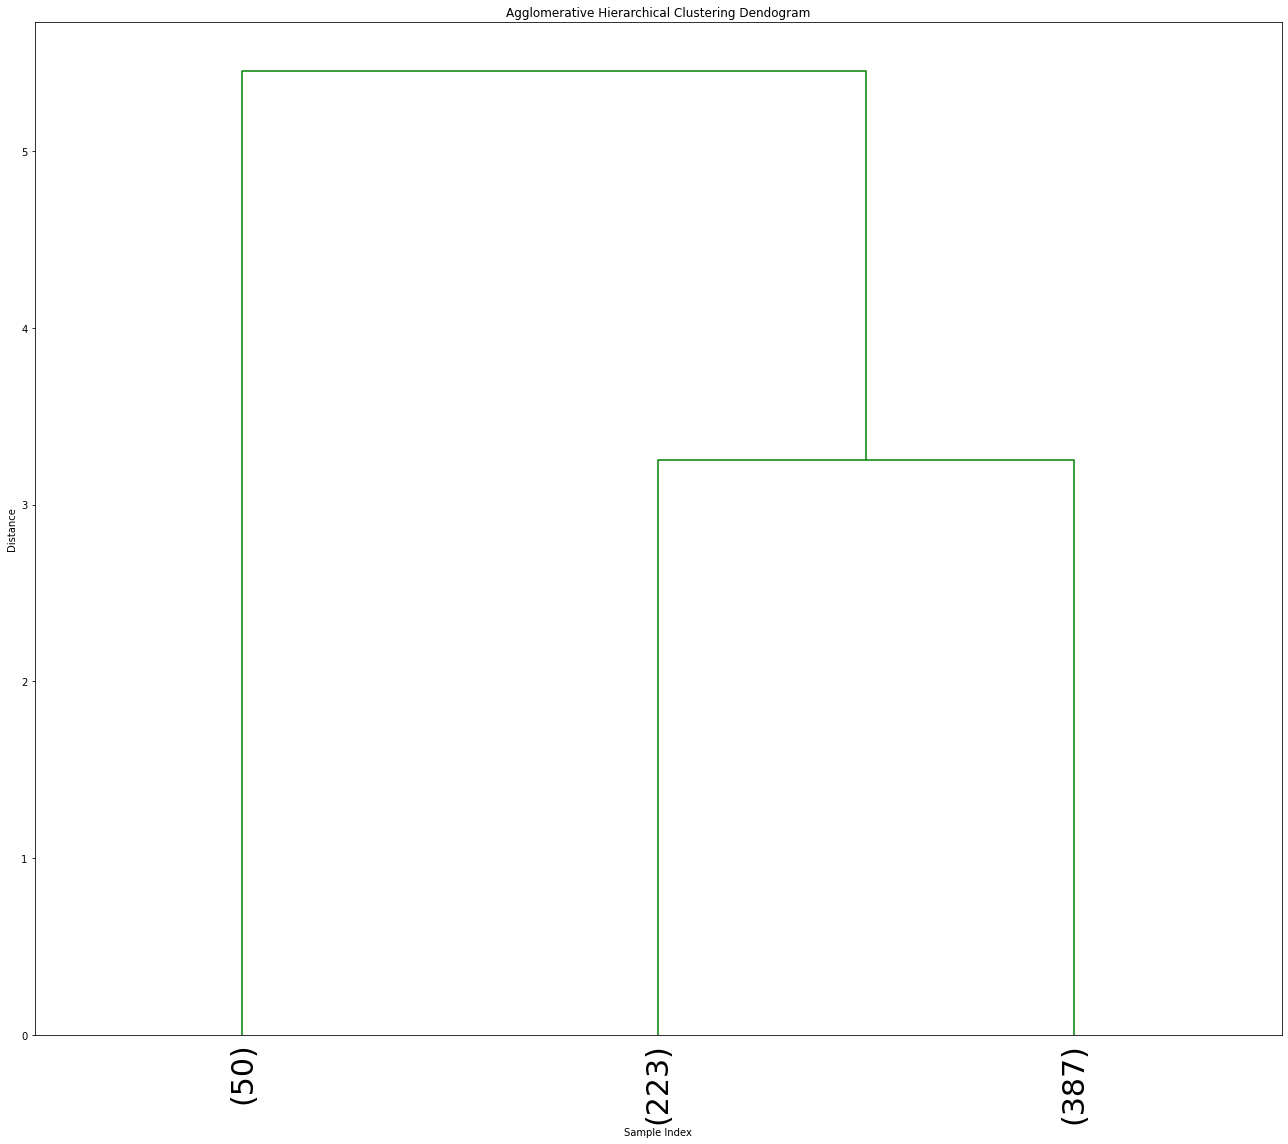

In [38]:

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=52,leaf_font_size=30,truncate_mode='lastp')
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ACF6990>,
      dtype=object)

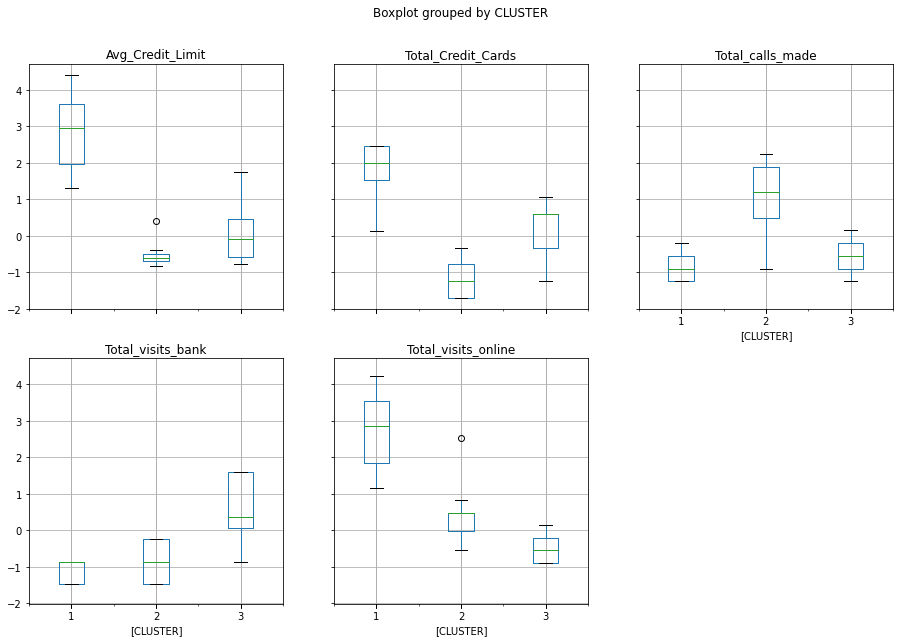

In [39]:
dfScaled.boxplot(by='CLUSTER', layout = (2,3),figsize=(15,10))

### We see similar trends from box plots in Heirarchial  and K-Means clustering.   

## Calculate (shown in their sections) siloutte score for both methods and compare K-Means clusters with Heirarchial clusters

### K-Means - 0.3557 for 3 clusters. 0.5157 for 2 clusters and 3 is a good choice. 
### Heirarchial - 0.5159 for 3 clusters, 3 is a good choice.

### K - Means -  Score 0.3557, with 3 clusters distribution looks better and 3 is a good choice
### Heirarchial - 0.5159, Linkage matix 'average' and distance 'euclidean', Cophentic Index 0.8977
### Box plots show same trends in both methods


##  Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. 

### People with Avg_Credit_Limit and Total_Credit_cards in the highest ranges have also Total_visits_online in the highest range. People with Avg_Credit_Limit and Total_Credit_cards in the intermediate ranges visit bank more than the other 2 clusters.  People with Avg_Credit_Limit and Total_Credit_cards in the lowest ranges make calls more than the other 2 clusters.
### This same trend is observed in box plots of both methods
### K - Means - Silhoutte scores were calculated for range of cluseters (1 through 10) and cluster size of 3 was chosen with satisfactory score and good distribution
### Heirarchial - Dentogram was plotted for the complete data frame with average linkage matrix with euclidean and from choosing height of 3.2 gave satisfactory and good distribution
### Credit card business revenue is maximized when customers have more number of credit cards and high average credit limit as they spend more and use crdit cards more and if they keep more balance it also helps the revenue. With that  category of high average credit limit and number of cards is the good category and it can help them if their on line experience is enhanced. The category in the intermediate credit limit and number of cards seem to visit bank more than other 2 categories, bank can focus on helping them in the visits. The category in the least revnue producting range call the banks more than the other 2 categories and they need better telephne call experience.